In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Code to create graph networks in NetworkX format.

def creating_graph(nodes, edges):
    """
    This is a simple function that takes 2 lists:
    1) nodes: list of nodes and that can be with or without positions.
    2) edges: List of connections and with their respective weights.
    """
    a = nx.Graph()
    a.add_nodes_from(nodes)
    a.add_edges_from(edges)
    return a


def uniquenodes(dataset):
    nodes = []
    hashNodes = {}
    intCounter = 0
    intNodeCounter = 0
    uniqueNodes = []
    for index, row in dataset.iterrows():
        start_point = (intCounter, {'pos':(row["startnode_x"], row["startnode_y"])})
        strKey = str(row["startnode_x"]) + "|" + str(row["startnode_y"])
        if strKey not in hashNodes:
            hashNodes[strKey]  = (intNodeCounter, {'pos':(row["startnode_x"], row["startnode_y"])})
            intNodeCounter += 1
            uniqueNodes.append(hashNodes[strKey])
        nodes.append(start_point)
        intCounter += 1
        end_point = (intCounter, {'pos':(row["endnode_x"], row["endnode_y"])})
        strKey = str(row["endnode_x"]) + "|" + str(row["endnode_y"])
        
        if strKey not in hashNodes:
            hashNodes[strKey]  = (intNodeCounter, {'pos':(row["endnode_x"], row["endnode_y"])})
            intNodeCounter += 1
            uniqueNodes.append(hashNodes[strKey])
            #hashNodes[strKey] += 1

        nodes.append(end_point)
        intCounter += 1
    return uniqueNodes, hashNodes


def edges(dataset, hashNodes):
    edges_in_graph = []
    for index, row in dataset.iterrows():
        start_point = str(row["startnode_x"]) + "|" + str(row["startnode_y"])
        end_point = str(row["endnode_x"]) + "|" + str(row["endnode_y"])
        if start_point != end_point:
            connection = (hashNodes[start_point][0], hashNodes[end_point][0], {"weight": row["distance"] })
            edges_in_graph.append(connection)
    return edges_in_graph



def graph_networkx(dataset, plt_size, node_size):
    uniqueNodes, hashNodes = uniquenodes(dataset)
    edges_in_graph = edges(dataset, hashNodes)
    graph_network = creating_graph(uniqueNodes, edges_in_graph)
    plt.figure(figsize= plt_size)
    nx.draw(graph_network, nx.get_node_attributes(graph_network, 'pos') , with_labels = False, node_size = node_size)
    plt.show()
    return graph_network

# Arizona Network

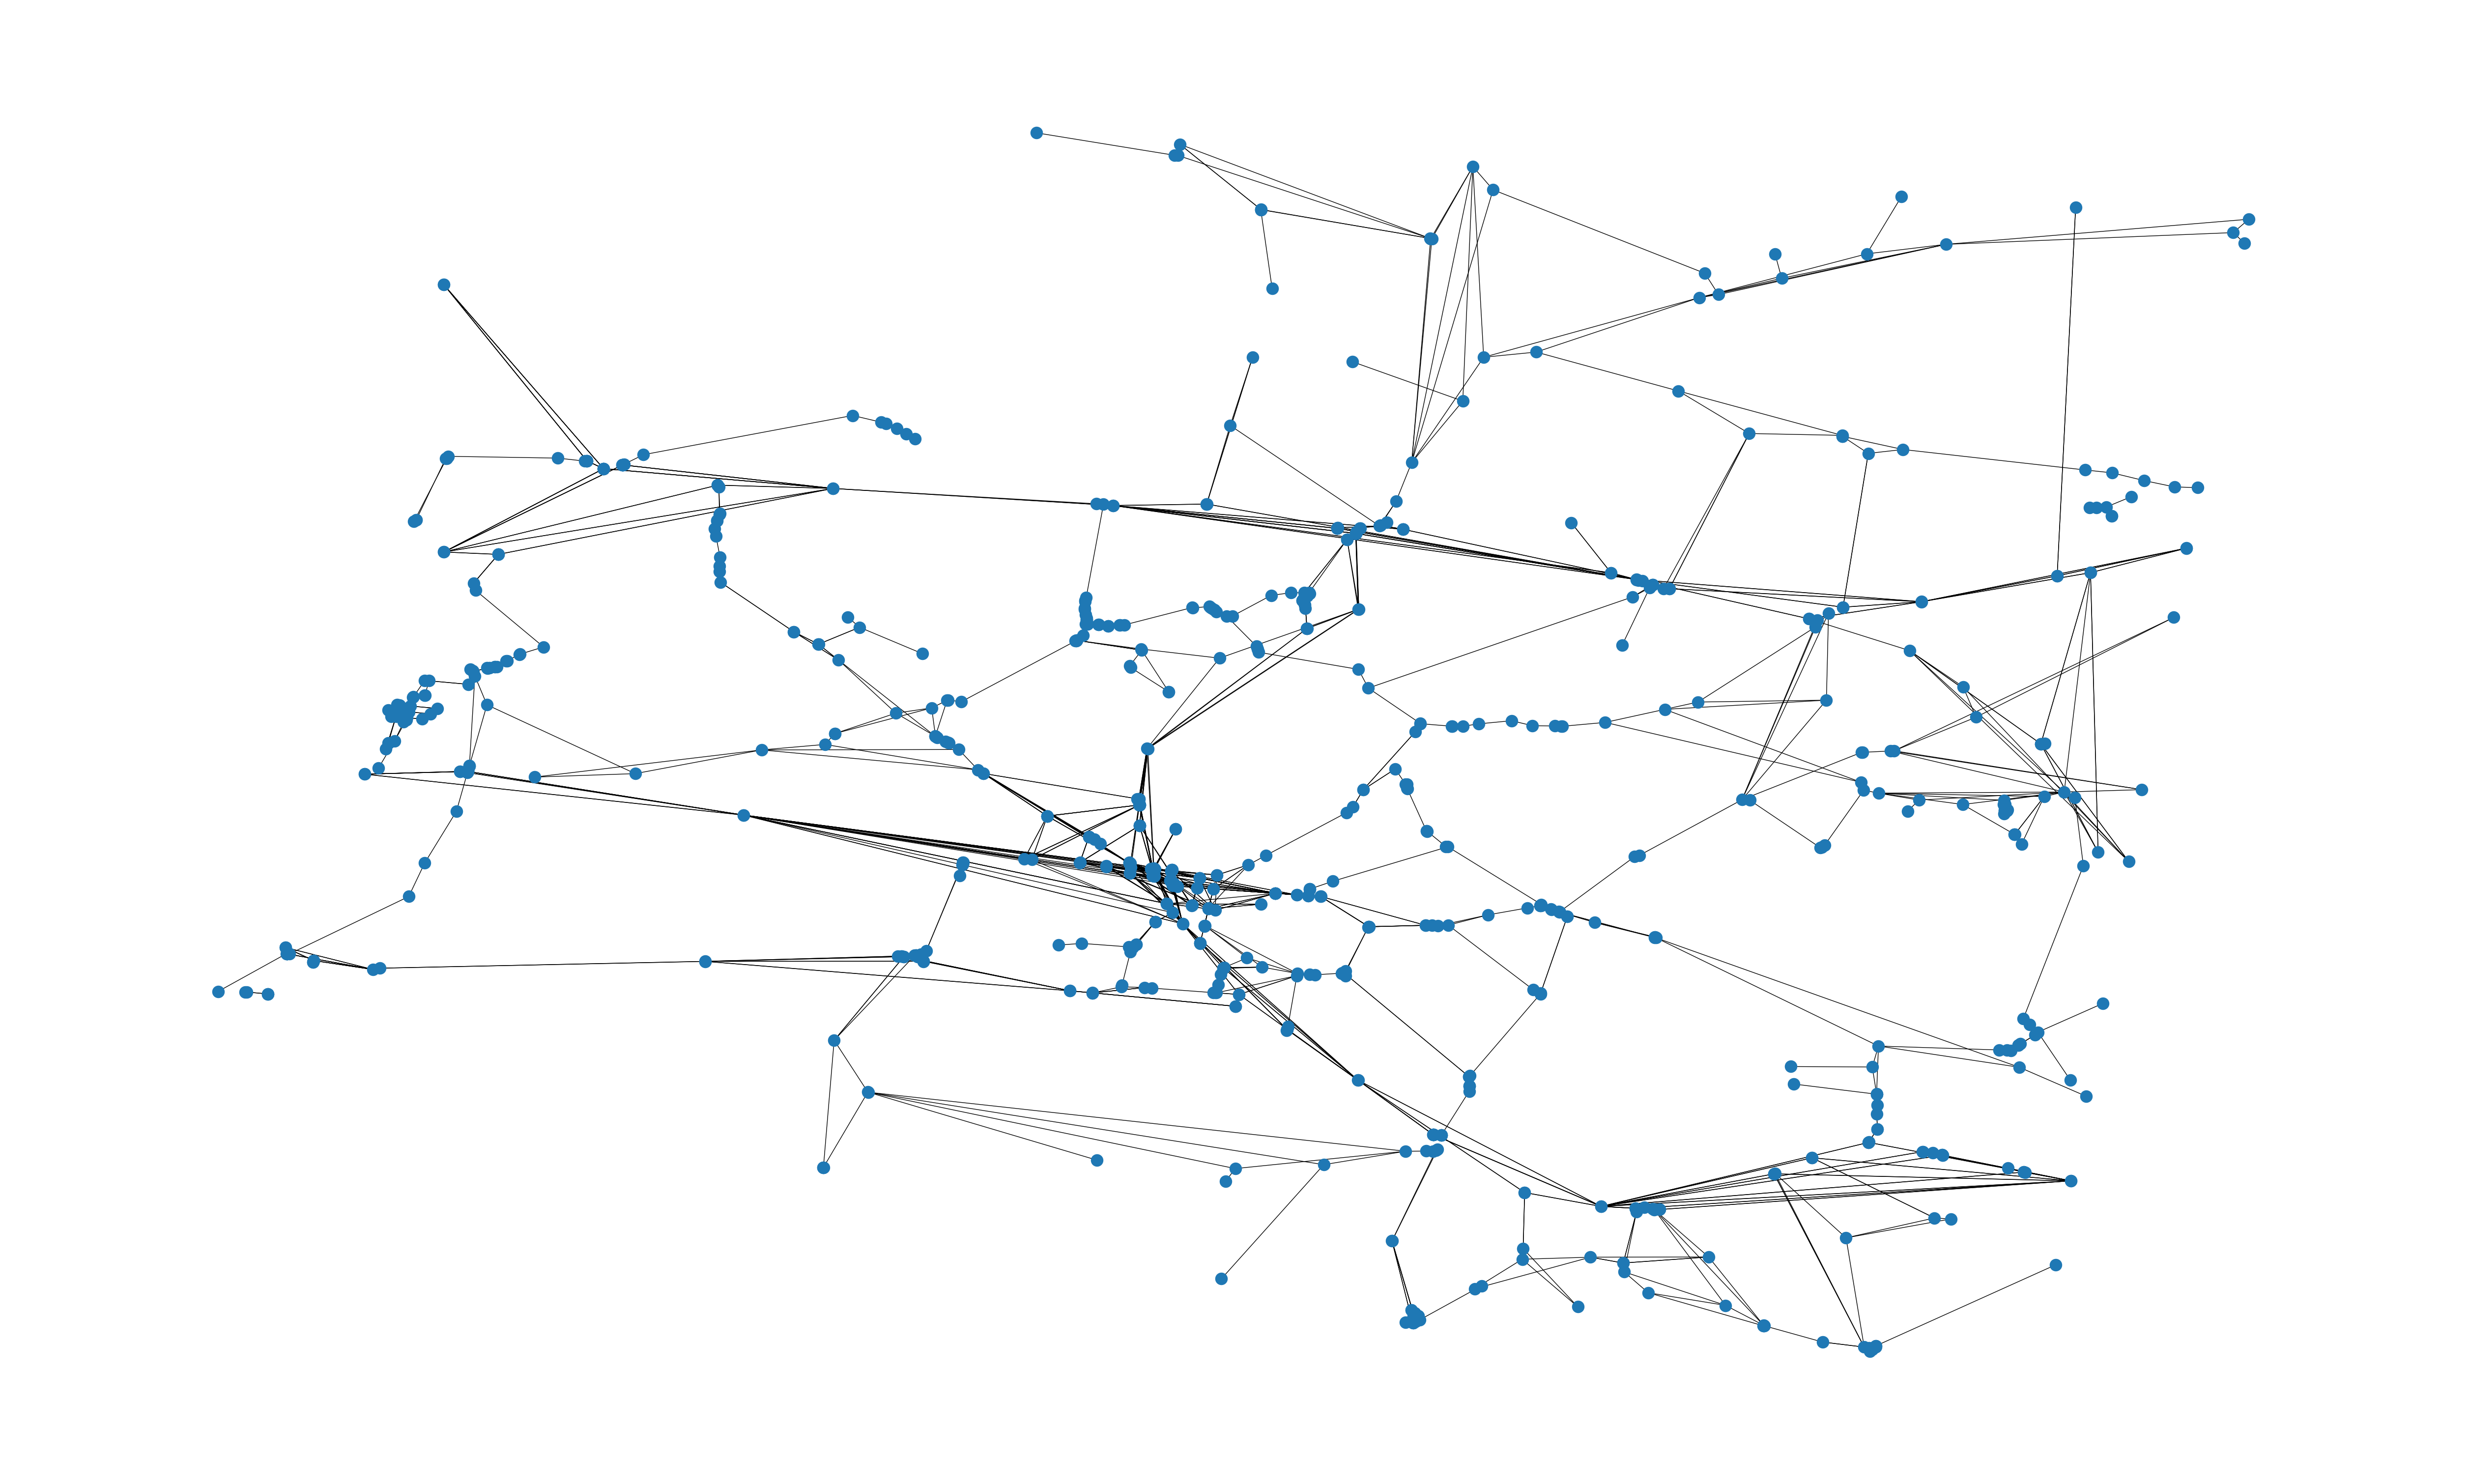

Number of nodes in the Arizona Network are: 834
Number of edges in the Arizona Network are: 1547


In [3]:
arizona_edge_list = pd.read_excel("Networks/arizona.xlsx")
arizona_network = graph_networkx(arizona_edge_list, plt_size = (50, 30), node_size = 300)
print(f"Number of nodes in the Arizona Network are: {nx.number_of_nodes(arizona_network)}")
print(f"Number of edges in the Arizona Network are: {nx.number_of_edges(arizona_network)}")

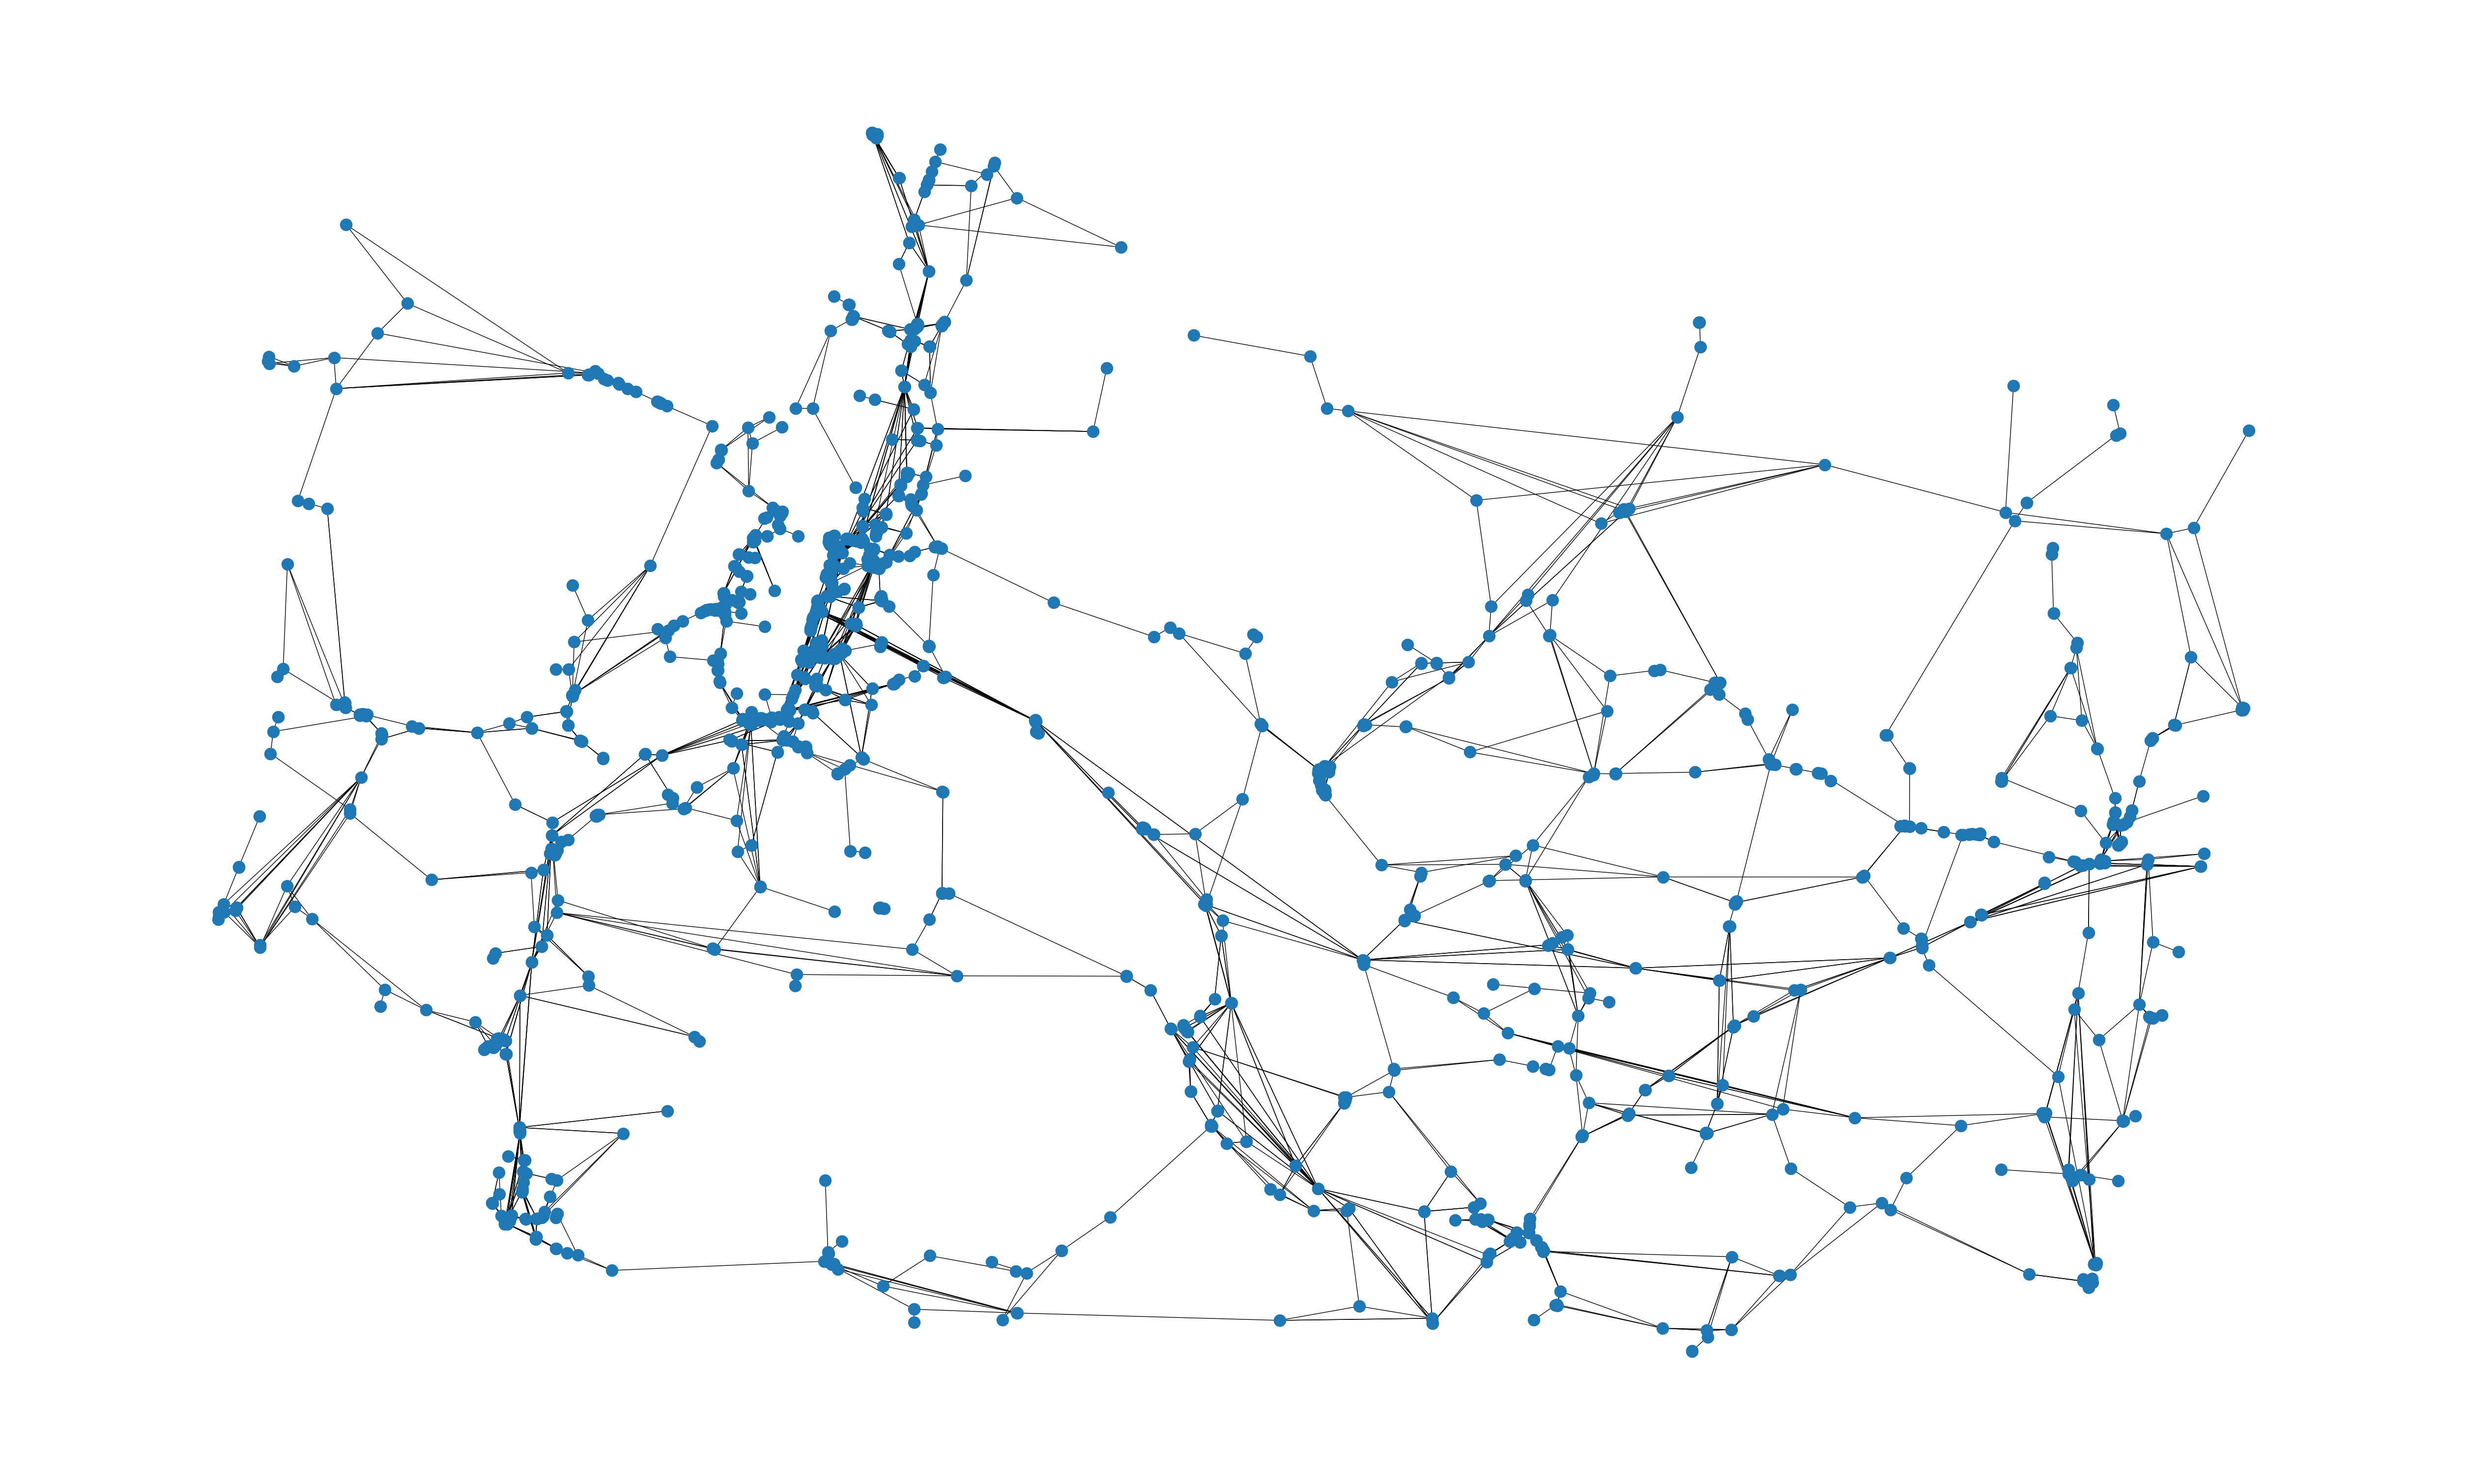

Number of nodes in the Washington Network are: 1564
Number of edges in the Washington Network are: 2784


In [4]:
washington_edge_list = pd.read_excel("Networks/washington.xlsx")
washington_network = graph_networkx(washington_edge_list, plt_size = (50, 30), node_size = 300)
print(f"Number of nodes in the Washington Network are: {nx.number_of_nodes(washington_network)}")
print(f"Number of edges in the Washington Network are: {nx.number_of_edges(washington_network)}")

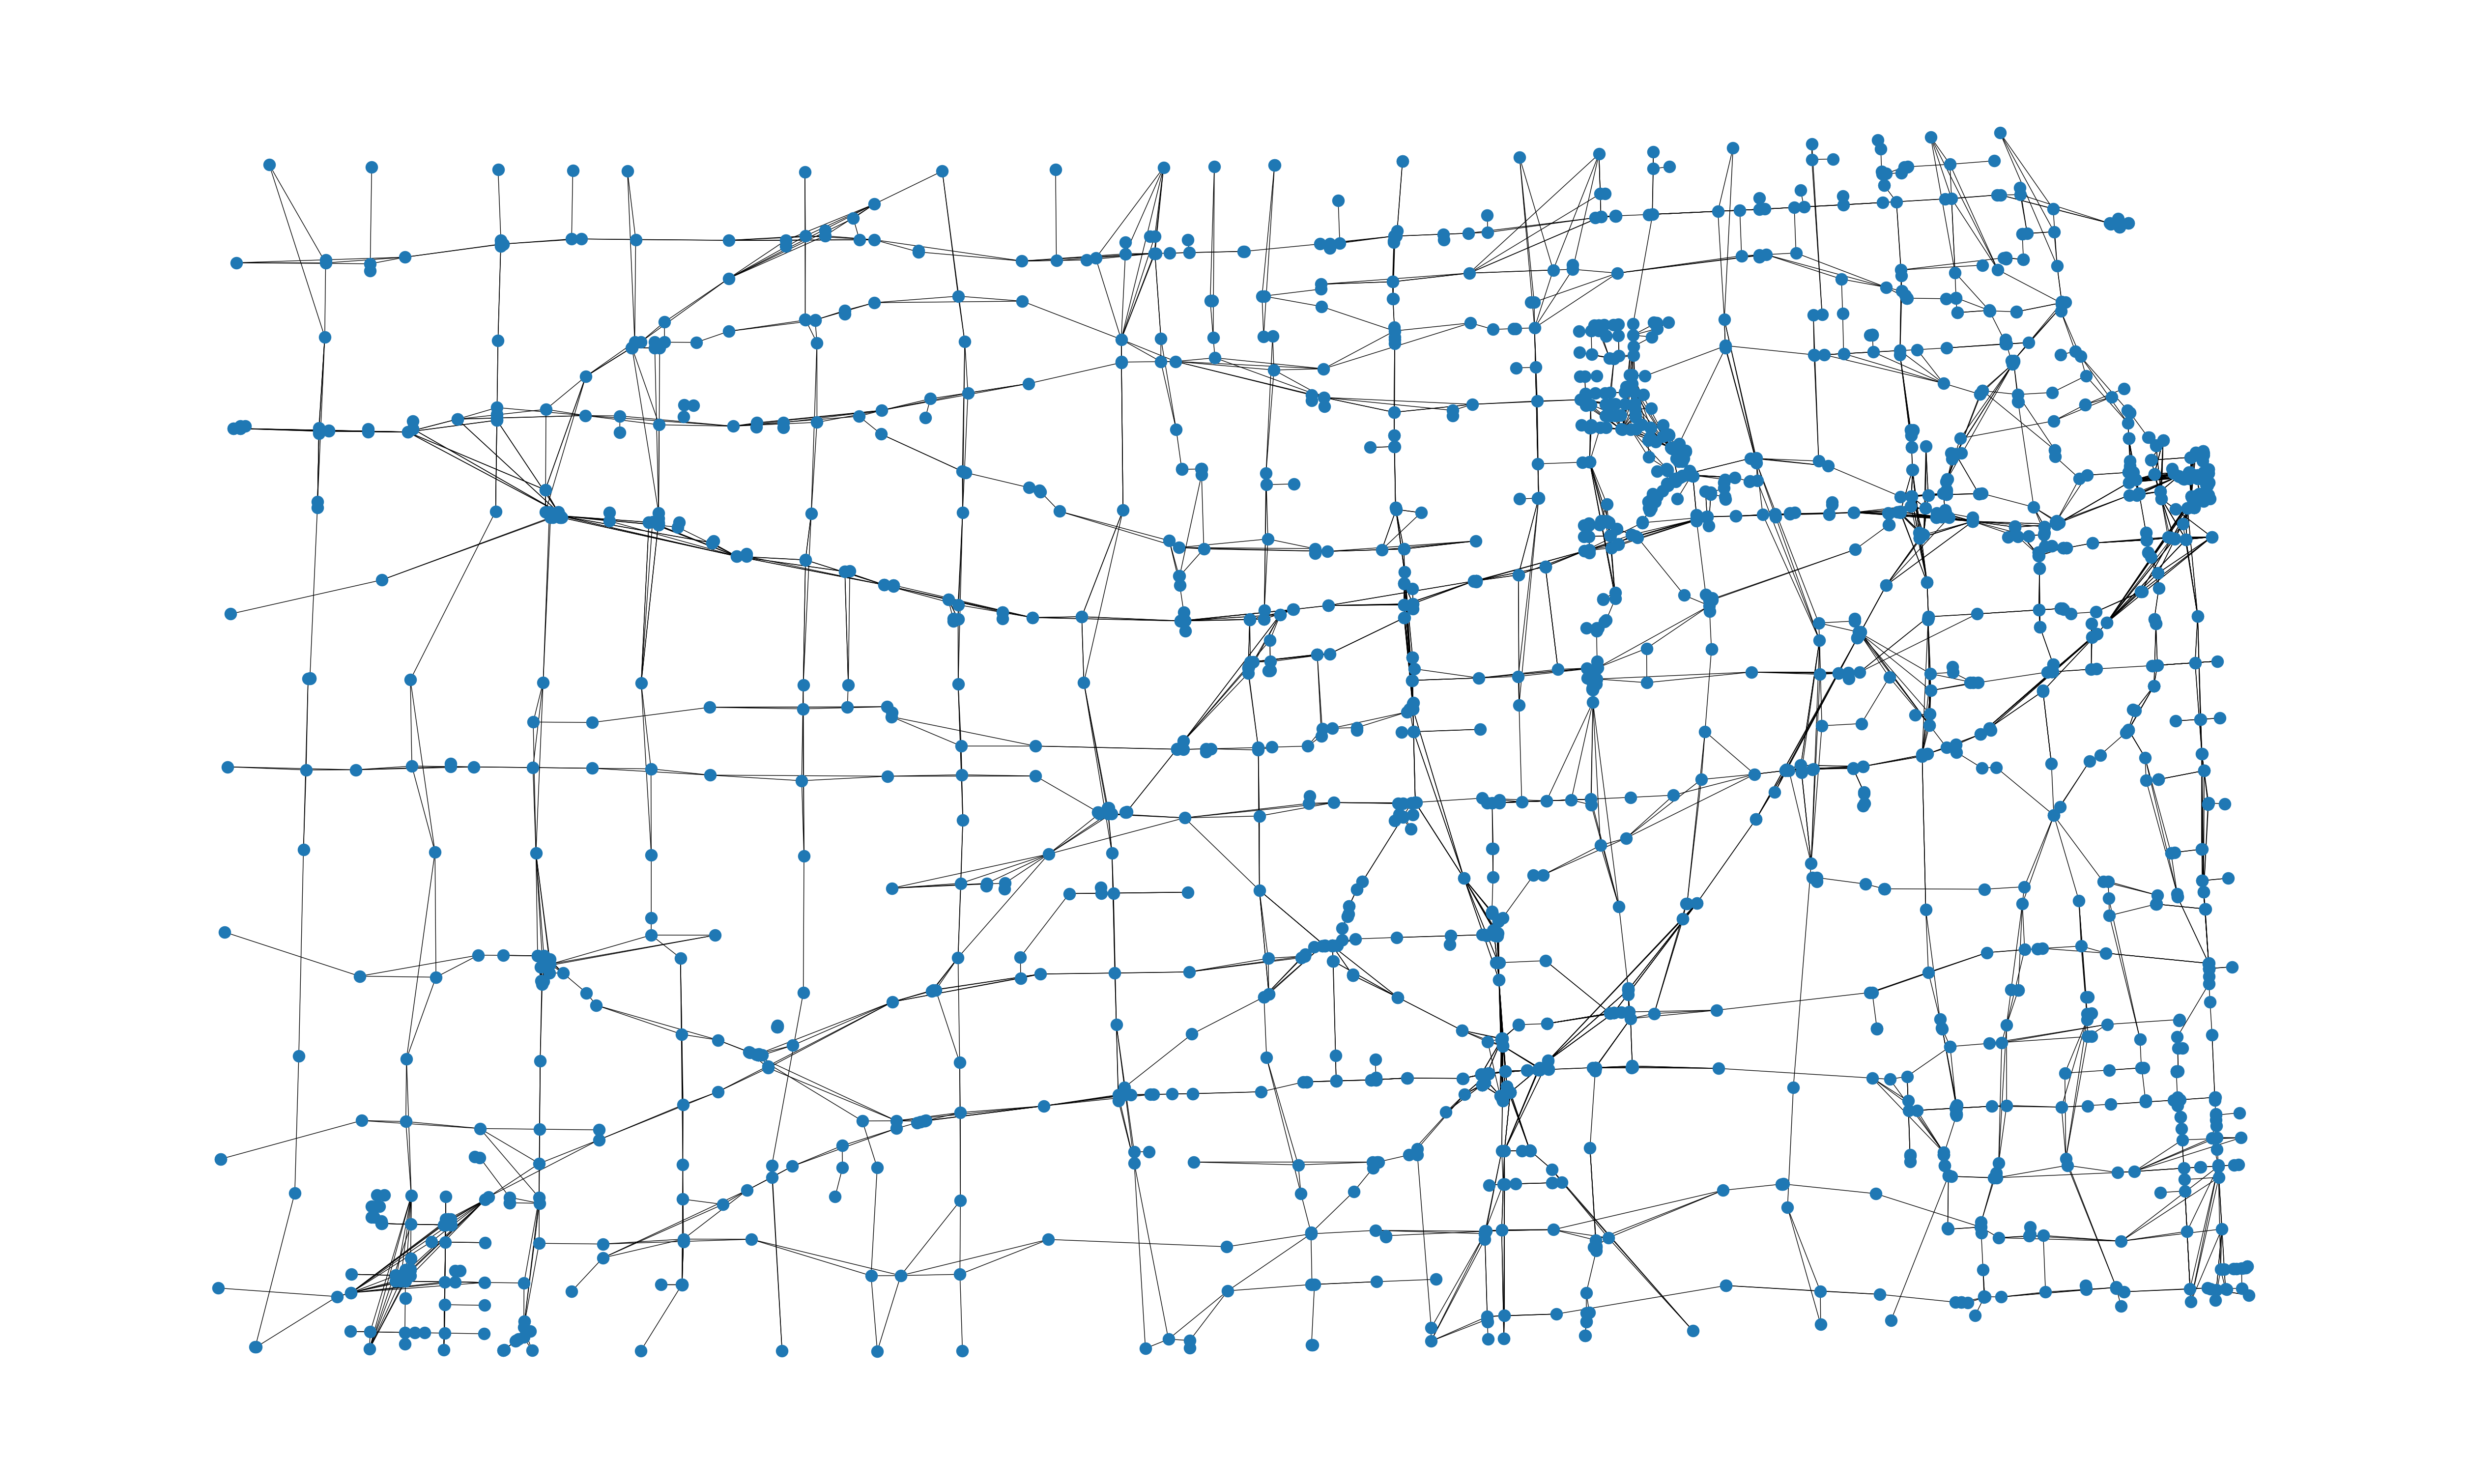

Number of nodes in the Kansas Network are: 2224
Number of edges in the Kansas Network are: 4257


In [5]:
kansas_edge_list = pd.read_excel("Networks/kansas.xlsx")
kansas_network = graph_networkx(kansas_edge_list, plt_size = (50, 30), node_size = 300)
print(f"Number of nodes in the Kansas Network are: {nx.number_of_nodes(kansas_network)}")
print(f"Number of edges in the Kansas Network are: {nx.number_of_edges(kansas_network)}")